<a href="https://colab.research.google.com/github/DeepakMupparapu/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210-2021 Final Project

## Health Insurance Charges Prediction and Risk Assessment Program

### Program Overview:
The Health Insurance Charges Prediction and Risk Assessment Program is designed to analyze health insurance data to predict higher charges and assess associated risk factors. The program employs machine learning techniques to predict whether an individual's healthcare charges will be higher than the average charges in the dataset.

The Health Insurance Charges Prediction and Risk Assessment Program aims to provide valuable insights for healthcare industry stakeholders, aiding in risk assessment, resource allocation, and decision-making processes. By leveraging machine learning and data analysis techniques, the program facilitates the identification of potential risk factors associated with higher healthcare charges.

### Goals:
1. **Predictive Modeling**: Develop a model to predict higher healthcare charges based on various factors such as age, BMI, number of children, and smoking status.
2. **Risk Assessment**: Identify and evaluate potential risk factors contributing to higher healthcare charges.

### Datasets Used:
1. **US Health Insurance Dataset (Kaggle)**:
   - Features: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'
   - Used for predictive modeling and risk assessment.

   This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

2. **Health Insurance Dataset (Kaggle)**:

   This dataset provides health insurance coverage data for each state and the nation as a whole, including variables such as the uninsured rates before and after Obamacare, estimates of individuals covered by employer and marketplace healthcare plans, and enrollment in Medicare and Medicaid programs.



### Program Workflow:
1. **Data Acquisition**:
   - Utilizes two health insurance datasets from Kaggle.
   - One dataset is downloaded as json file and uploaded from local drive.
   - Loads data from json file.
   - Link to source (https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)
   - Second dataset is pulled directly from the source using URL as csv file.
   - Link to source (https://www.kaggle.com/datasets/hhs/health-insurance)
   - Loads data from CSV files.

2. **Data Preprocessing**:
   - Handles missing values, converts categorical data to numerical form using encoding techniques.
   - Prepares the data for model training.

3. **Predictive Modeling**:
   - Applies a logistic regression model to predict higher healthcare charges based on features like age, BMI, children, and smoking status.
   - Assesses model performance using evaluation metrics like accuracy, precision, recall, and F1-score.

4. **Risk Assessment**:
   - Identifies significant factors contributing to higher charges.
   - Evaluates the importance of features in predicting increased healthcare costs.

5. **Data Visualization**:
   - Utilizes visualizations (histograms, scatter plots, boxplot, bar chart  confusion matrix, ROC curve) to present insights into data distributions, model performance, and risk assessment results.



In [101]:
import pandas as pd

# Load the dataset from a local Jason file
file_path = 'insurance.json'
data = pd.read_json(file_path)

# Display the first few rows to verify data loading
print("US Health Insurance Dataset:")
print(data.head())


US Health Insurance Dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Download extra data from kaggle: https://www.kaggle.com/hhs/health-insurance

In [102]:
!pip install opendatasets --upgrade --quiet

In [103]:
import pandas as pd
import os
import opendatasets as od

In [104]:
#After running the below snippet it directs you to provide kaggle username and password. You can use the below credentials
#username : deepakmupparapu
#key : 9ecccfd6843ff9f84337d99e0c3946a0
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/hhs/health-insurance'
# Using opendatasets let's download the data sets
od.download(dataset)

Skipping, found downloaded files in "./health-insurance" (use force=True to force download)


Merge the insurance.csv and states.csv:

In [105]:
import pandas as pd
insurance_data = pd.read_json('insurance.json')
states_data = pd.read_csv('health-insurance/states.csv')

# Merge the datasets on the 'region' column,
merged_data = pd.merge(insurance_data, states_data[['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)',
                                                    'Uninsured Rate Change (2010-2015)', 'Health Insurance Coverage Change (2010-2015)',
                                                    'Employer Health Insurance Coverage (2015)', 'Marketplace Health Insurance Coverage (2016)',
                                                    'Marketplace Tax Credits (2016)', 'Average Monthly Tax Credit (2016)',
                                                    'State Medicaid Expansion (2016)', 'Medicaid Enrollment (2013)',
                                                    'Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)',
                                                    'Medicare Enrollment (2016)']],
                       how='left', left_on='region', right_on='State')

merged_data.drop(columns='State', inplace=True)

print(merged_data.head())


   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

  Uninsured Rate (2010) Uninsured Rate (2015)  \
0                   NaN                   NaN   
1                   NaN                   NaN   
2                   NaN                   NaN   
3                   NaN                   NaN   
4                   NaN                   NaN   

  Uninsured Rate Change (2010-2015)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   Health Insurance Coverage Change (2010-2015)  \
0               

In [106]:
merged_data.shape

(1338, 20)

## Data Aggregation and Pivoting

In [107]:
# Calculate average charges by sex and smoker status
average_charges = data.groupby(['sex', 'smoker'])['charges'].mean().reset_index()

# Display the aggregated data
print(average_charges)


      sex smoker       charges
0  female     no   8762.297300
1  female    yes  30678.996276
2    male     no   8087.204731
3    male    yes  33042.005975


Calculating Summary Statistics

In [108]:
# Calculate summary statistics for charges based on regions
summary_by_region = data.groupby('region')['charges'].agg(['mean', 'median', 'min', 'max']).reset_index()

# Display summary statistics
print(summary_by_region)


      region          mean        median        min          max
0  northeast  13406.384516  10057.652025  1694.7964  58571.07448
1  northwest  12417.575374   8965.795750  1621.3402  60021.39897
2  southeast  14735.411438   9294.131950  1121.8739  63770.42801
3  southwest  12346.937377   8798.593000  1241.5650  52590.82939


Aggregating with Multiple Functions

In [109]:
# Calculate total charges and average BMI for each combination of sex and smoker status
aggregated_data = data.groupby(['sex', 'smoker']).agg({'charges': 'sum', 'bmi': 'mean'}).reset_index()

# Display aggregated data
print(aggregated_data)


      sex smoker       charges        bmi
0  female     no  4.792977e+06  30.539525
1  female    yes  3.528085e+06  29.608261
2    male     no  4.181085e+06  30.770580
3    male    yes  5.253679e+06  31.504182


Pivoting Data

In [110]:
# Pivot the data to see charges based on different regions and smoker status
pivoted_data = data.pivot_table(index='region', columns='smoker', values='charges', aggfunc='mean')

# Display the pivoted data
print(pivoted_data)


smoker              no           yes
region                              
northeast  9165.531672  29673.536473
northwest  8556.463715  30192.003182
southeast  8032.216309  34844.996824
southwest  8019.284513  32269.063494


## Data Transformation

Converting Categorical to Numerical Values

In [111]:
# Mapping 'sex' column to numerical values
data['sex_numeric'] = data['sex'].map({'female': 0, 'male': 1})


**Feature Engineering:**

Creating a New BMI Category

In [112]:
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


**Data Normalization/Scaling:**

Normalize or scale numerical features to a standard range.

Scaling 'charges' Column using Min-Max Scaling

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['charges_scaled'] = scaler.fit_transform(data[['charges']])


**Handling Missing Values:**

Handling Missing Values by Dropping Rows

In [114]:
data.dropna(subset=['bmi'], inplace=True)


**Date/Time Feature Extraction:**

Extract date or time-related features from timestamp

Extracting Year from 'age' Column

In [115]:
data['birth_year'] = 2023 - data['age']


## Visualization

Histogram of Age Distribution:

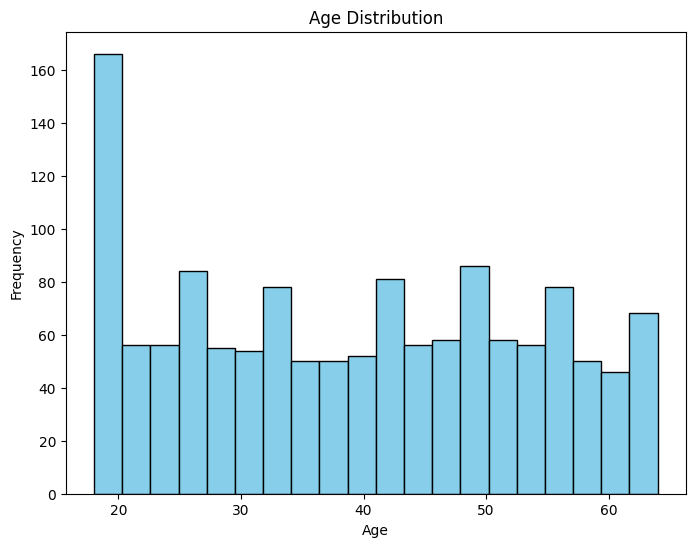

In [116]:
import matplotlib.pyplot as plt

# Histogram for Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Scatter Plot for Charges vs. BMI:

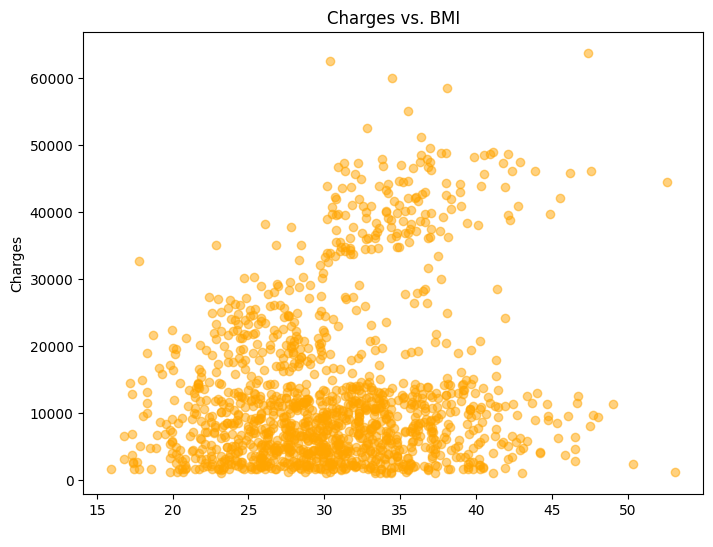

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(data['bmi'], data['charges'], alpha=0.5, color='orange')
plt.title('Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


Boxplot of Charges Grouped by Smoker Status:

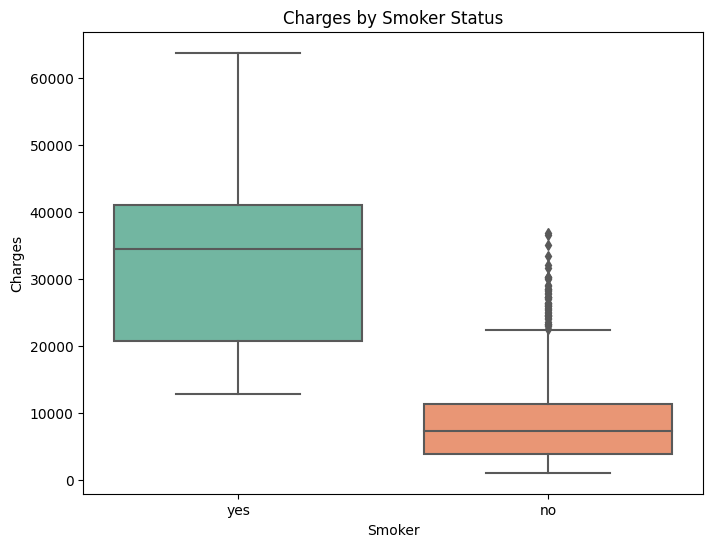

In [118]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


Bar Chart for Average Charges by Region:

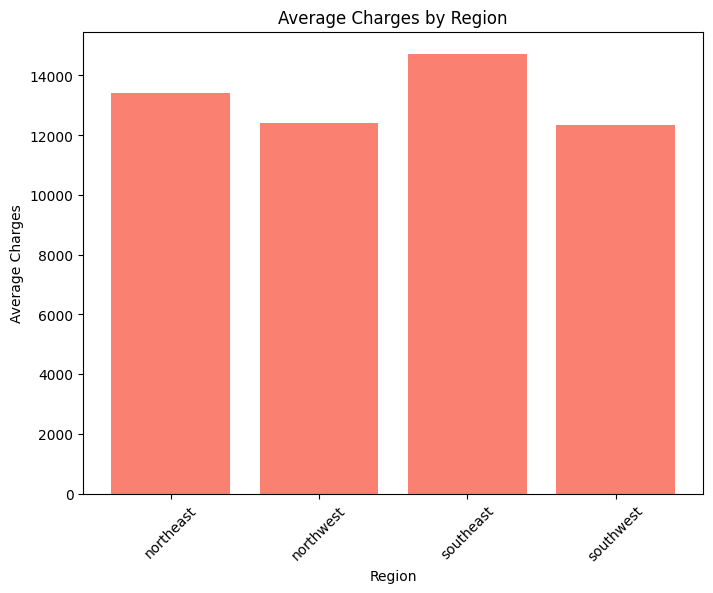

In [119]:
average_charges_by_region = data.groupby('region')['charges'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(average_charges_by_region['region'], average_charges_by_region['charges'], color='salmon')
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()


## Problem Applicability

In [120]:
import numpy as np


In [121]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression  # Add this import


categorical_cols = ['smoker']
numerical_cols = ['age', 'bmi', 'children']

# Preprocessing pipeline for categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Create a pipeline with preprocessing and model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on training data
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Visualizing Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
